In [24]:
import pandas as pd 
df = pd.read_csv("bankruptcy_data.csv")
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [25]:
constant_features = [col for col in df.columns if df[col].nunique() == 1]
print("constant_features ", constant_features)

constant_features  [' Net Income Flag']


In [26]:
df.drop(columns=[' Net Income Flag'], inplace=True)


In [27]:
df['Bankrupt?'].value_counts(normalize=True)


Bankrupt?
0    0.967737
1    0.032263
Name: proportion, dtype: float64

Top Positive Correlations:
 Bankrupt?                               1.000000
 Debt ratio %                           0.250161
 Current Liability to Assets            0.194494
 Borrowing dependency                   0.176543
 Current Liability to Current Assets    0.171306
 Liability to Equity                    0.166812
 Current Liabilities/Equity             0.153828
 Current Liability to Equity            0.153828
 Liability-Assets Flag                  0.139212
 Total expense/Assets                   0.139049
Name: Bankrupt?, dtype: float64

Top Negative Correlations:
 Working Capital to Total Assets                           -0.193083
Per Share Net profit before tax (Yuan ¥)                  -0.201395
Net profit before tax/Paid-in capital                     -0.207857
Retained Earnings to Total Assets                         -0.217779
Persistent EPS in the Last Four Seasons                   -0.219560
Net worth/Assets                                          -0.250161
ROA(C) before

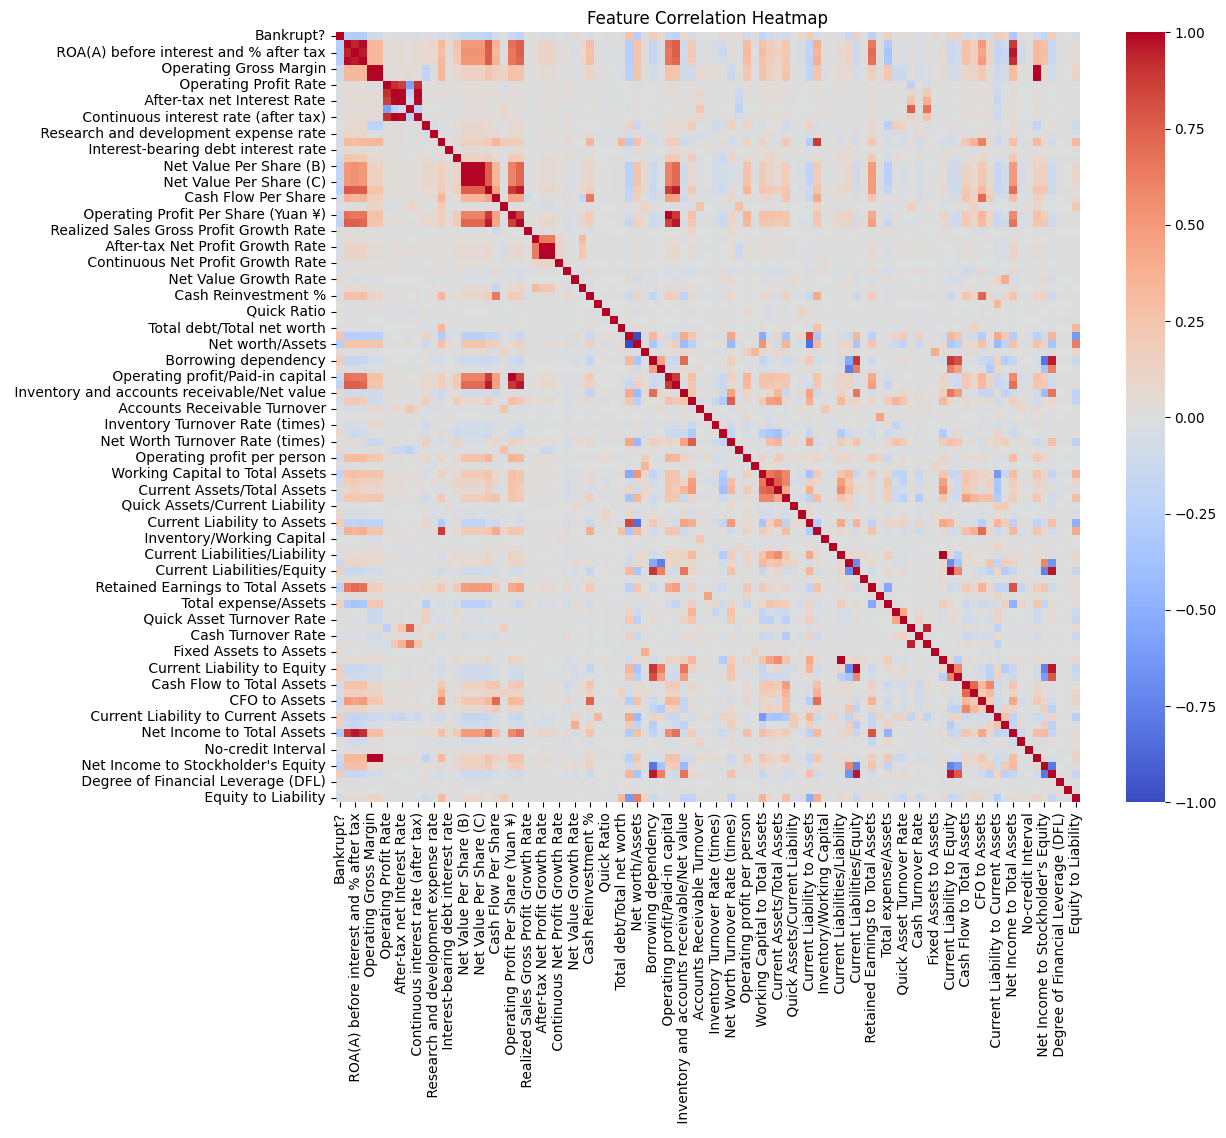

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation = df.corr(numeric_only=True)['Bankrupt?'].sort_values(ascending=False)
print("Top Positive Correlations:\n", correlation.head(10))
print("\nTop Negative Correlations:\n", correlation.tail(10))
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()


In [29]:
X = df.drop(columns=['Bankrupt?'])
variances = X.var()
low_variance_threshold = 0.0001
low_variance_features = variances[variances < low_variance_threshold].index.tolist()
print("low variance ", low_variance_features)


low variance  [' Total Asset Return Growth Rate Ratio', ' Working capitcal Turnover Rate', ' Cash Flow to Sales']


In [30]:
df = df.drop(columns=low_variance_features)


In [33]:
import numpy as np
corr_matrix = df.drop(columns=['Bankrupt?']).corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.95)]
print("highly correlated features", high_corr_features)

highly correlated features [' ROA(B) before interest and depreciation after tax', ' Realized Sales Gross Margin', ' After-tax net Interest Rate', ' Continuous interest rate (after tax)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Per Share Net profit before tax (Yuan ¥)', ' Regular Net Profit Growth Rate', ' Net worth/Assets', ' Operating profit/Paid-in capital', ' Net profit before tax/Paid-in capital', ' Current Liability to Liability', ' Current Liability to Equity', ' Net Income to Total Assets', ' Gross Profit to Sales', ' Liability to Equity']


In [34]:
df.drop(columns=high_corr_features, inplace=True)
print("New shape of dataset after dropping highly correlated features:", df.shape)


New shape of dataset after dropping highly correlated features: (6819, 76)
